<a href="https://colab.research.google.com/github/njauflo/Blightbuster/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.optimizers
from sklearn.metrics import classification_report, confusion_matrix

Fetching data

In [7]:
# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/potato/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/potato/valid',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 4656 images belonging to 3 classes.
Found 511 images belonging to 3 classes.


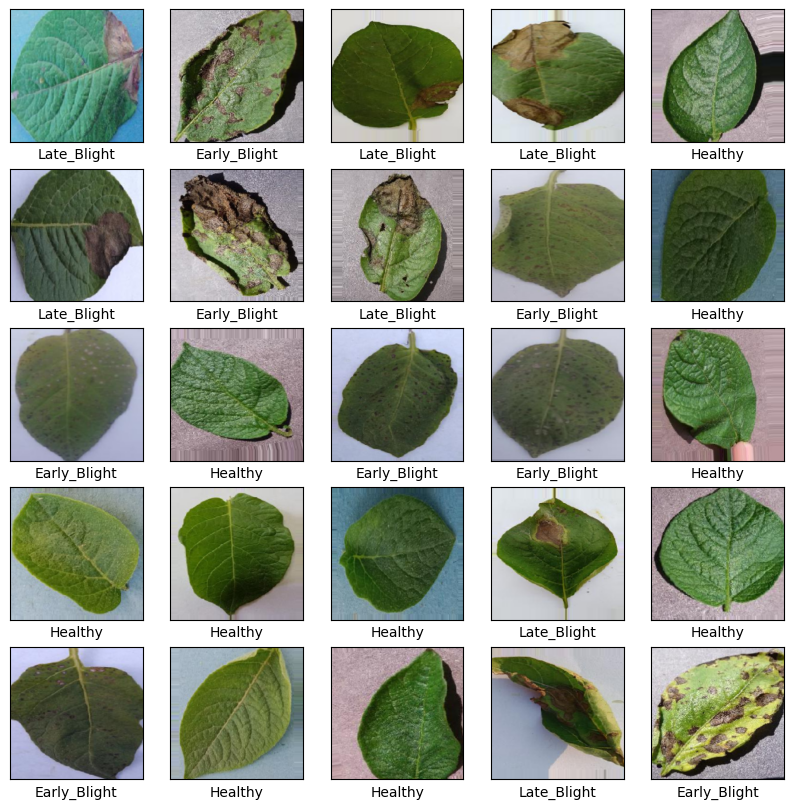

In [8]:
images, labels = next(train_generator)

# Plot the images in the batch along with their corresponding labels
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(list(train_generator.class_indices.keys())[np.argmax(labels[i])])
plt.show()


In [9]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_generator, validation_data=validation_generator, epochs=30)



Epoch 1/30
146/146 [==============================] - 1239s 8s/step - loss: 0.6581 - accuracy: 0.7326 - val_loss: 0.4432 - val_accuracy: 0.8043
Epoch 2/30
146/146 [==============================] - 78s 535ms/step - loss: 0.3870 - accuracy: 0.8464 - val_loss: 0.8520 - val_accuracy: 0.6654
Epoch 3/30
146/146 [==============================] - 77s 529ms/step - loss: 0.3121 - accuracy: 0.8823 - val_loss: 0.3268 - val_accuracy: 0.8767
Epoch 4/30
146/146 [==============================] - 77s 526ms/step - loss: 0.2937 - accuracy: 0.8875 - val_loss: 0.2600 - val_accuracy: 0.8943
Epoch 5/30
146/146 [==============================] - 78s 530ms/step - loss: 0.2541 - accuracy: 0.9008 - val_loss: 0.3118 - val_accuracy: 0.8689
Epoch 6/30
146/146 [==============================] - 77s 527ms/step - loss: 0.2109 - accuracy: 0.9223 - val_loss: 0.2718 - val_accuracy: 0.8963
Epoch 7/30
146/146 [==============================] - 77s 522ms/step - loss: 0.2261 - accuracy: 0.9158 - val_loss: 0.2530 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
# for layers in base_model.layers[-4]:
#   layer.trainable = True

# model.compile(optimizer=keras.optimizer.Adam(lr=0.0001),
#               loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(train_generator, validation_data=validation_generator,epoch = 30)

# Save the trained model
model.save('/content/drive/My Drive/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Load the test data
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/potato/test',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)

predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = tf.argmax(predictions, axis=1)

# Print a classification report
print(classification_report(test_generator.classes, predicted_classes, target_names=test_generator.class_indices.keys()))

Found 405 images belonging to 3 classes.
13/13 [==============================] - 62s 5s/step
              precision    recall  f1-score   support

Early_Blight       0.92      0.94      0.93       162
     Healthy       0.97      0.88      0.92       102
 Late_Blight       0.88      0.91      0.90       141

    accuracy                           0.92       405
   macro avg       0.92      0.91      0.92       405
weighted avg       0.92      0.92      0.92       405



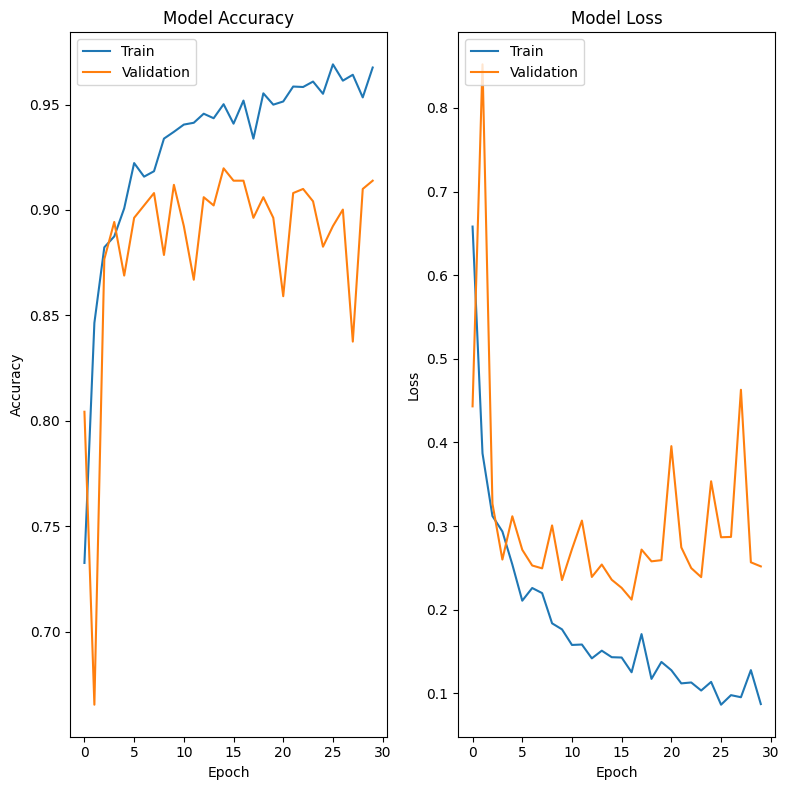

In [14]:
# Plot the accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

[[152   0  10]
 [  5  90   7]
 [  9   3 129]]


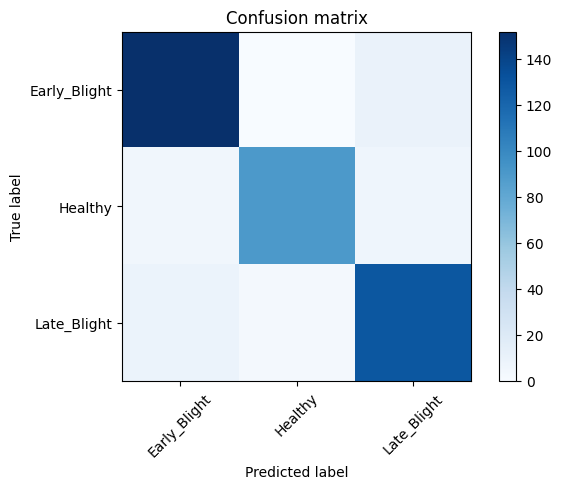

In [15]:
# Print a confusion matrix
print(confusion_matrix(test_generator.classes, predicted_classes))

cm = confusion_matrix(test_generator.classes, predicted_classes)

# Visualize the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
